# Classification using Decision Trees

Verifying the accuracy and fine-tuning of parameters of Decision trees' implementation of scikit-learn. "Smiley" dataset is used for classification.




In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import math
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def check_accuracy(y_pred, Y_test, header, df_hold_scores ):
    
    print('\n')
    print('\033[1m' + header + '\033[0m')
    print('\n')
    
    class_tree = accuracy_score(y_pred, Y_test)
    df_hold_scores.loc[len(df_hold_scores)] = [ header , class_tree]   
    
    print("Test accuracy: {:.2f}%".format(class_tree*100))

    confusion_matrix_1 = confusion_matrix(Y_test, y_pred)

    my_matrix = sns.heatmap(confusion_matrix_1, annot=True, cmap='Blues')
    my_matrix.set_title('Accuracy');
    my_matrix.set_xlabel('\nPredicted Values')
    my_matrix.set_ylabel('Actual Values ');
    my_matrix.xaxis.set_ticklabels(['False','True'])
    my_matrix.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

# Displaying the
    print(confusion_matrix(Y_test, y_pred))
    print("\n")
    print(classification_report(Y_test, y_pred))
    print(roc_auc_score(Y_test, y_pred))

    fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
    display.plot()
    plt.show()


In [3]:
X = np.load('smiley_X.npy')
Y = np.load('smiley_Y.npy')
df_hold_scores = pd.DataFrame(columns=['header', 'score'])

In [4]:
# Reshape X into 2D array and split into train & test sets
X_train, X_test, Y_train, Y_test = train_test_split(np.reshape(X,(144,81)), Y,test_size=0.2,random_state=0)


##########################################################################################
# For use in later parts which require 30% and 60% reduction in training set
##########################################################################################

# Add 30% os original training set into test set 
X_train_extract30, X_temp_extra_30, Y_train_extract30, Y_temp_extra_30 = train_test_split(X_train,Y_train ,test_size=0.3,random_state=0)

# The original training set is now reduced and held in X_train_extract30 Y_train_extract30
X_test_extra_30 = np.append(X_test, X_temp_extra_30, axis=0)
Y_test_extra_30 = np.append(Y_test, Y_temp_extra_30, axis=0)


# Add 60% os original training set into test set 
X_train_extract60, X_temp_extra_60, Y_train_extract60, Y_temp_extra_60 = train_test_split(X_train,Y_train ,test_size=0.6,random_state=0)
# The original training set is now reduced and held in X_train_extract60 Y_train_extract60
X_test_extra_60 = np.append(X_test, X_temp_extra_60, axis=0)
Y_test_extra_60 = np.append(Y_test, Y_temp_extra_60, axis=0)


[Text(0.6666666666666666, 0.875, 'X[57] <= 0.5\ngini = 0.5\nsamples = 115\nvalue = [58, 57]'),
 Text(0.5, 0.625, 'X[66] <= 0.5\ngini = 0.447\nsamples = 86\nvalue = [29, 57]'),
 Text(0.3333333333333333, 0.375, 'X[43] <= 0.5\ngini = 0.236\nsamples = 66\nvalue = [9, 57]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]')]

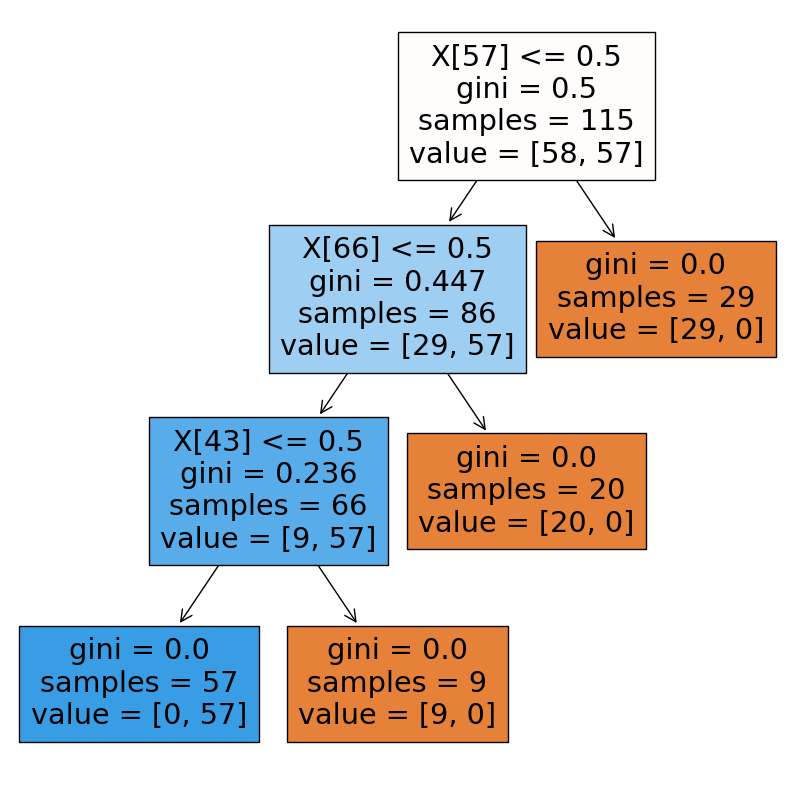

In [5]:
from sklearn.tree import export_graphviz
from sklearn import tree
tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_clf.fit(X_train, Y_train)
# plot_tree(tree_clf);

plt.figure(figsize=(10,10))
tree.plot_tree(tree_clf,filled=True)

In [6]:
print(tree.export_text(tree_clf))

|--- feature_57 <= 0.50
|   |--- feature_66 <= 0.50
|   |   |--- feature_43 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- feature_43 >  0.50
|   |   |   |--- class: 0.0
|   |--- feature_66 >  0.50
|   |   |--- class: 0.0
|--- feature_57 >  0.50
|   |--- class: 0.0



## Using graphviz with hearmap to identify best hyper parameters

TRAIN SCORE


C:\Users\Derek\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


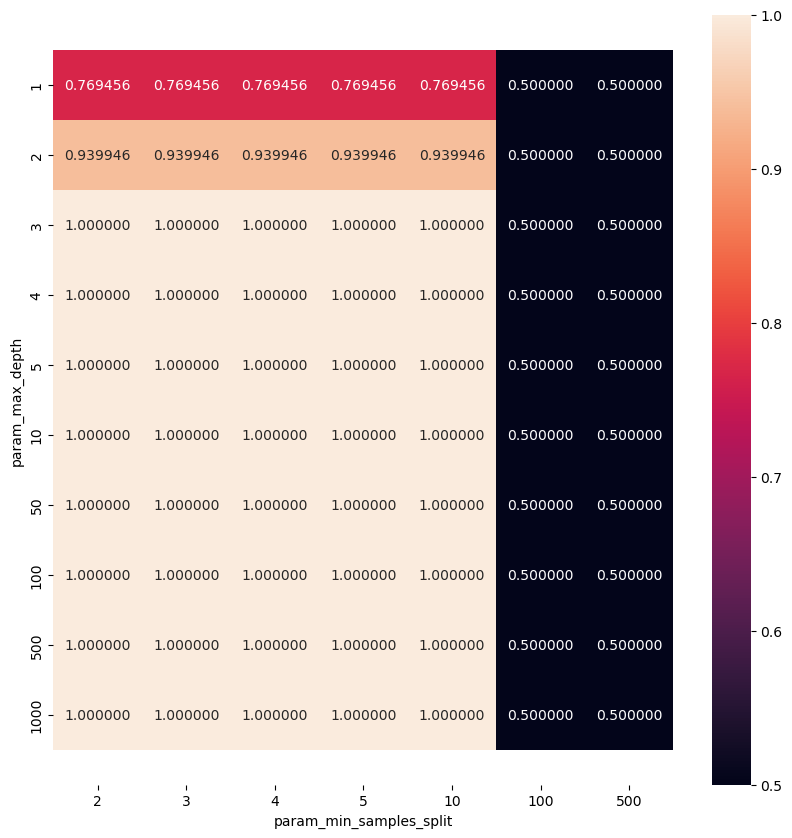

TEST SCORE


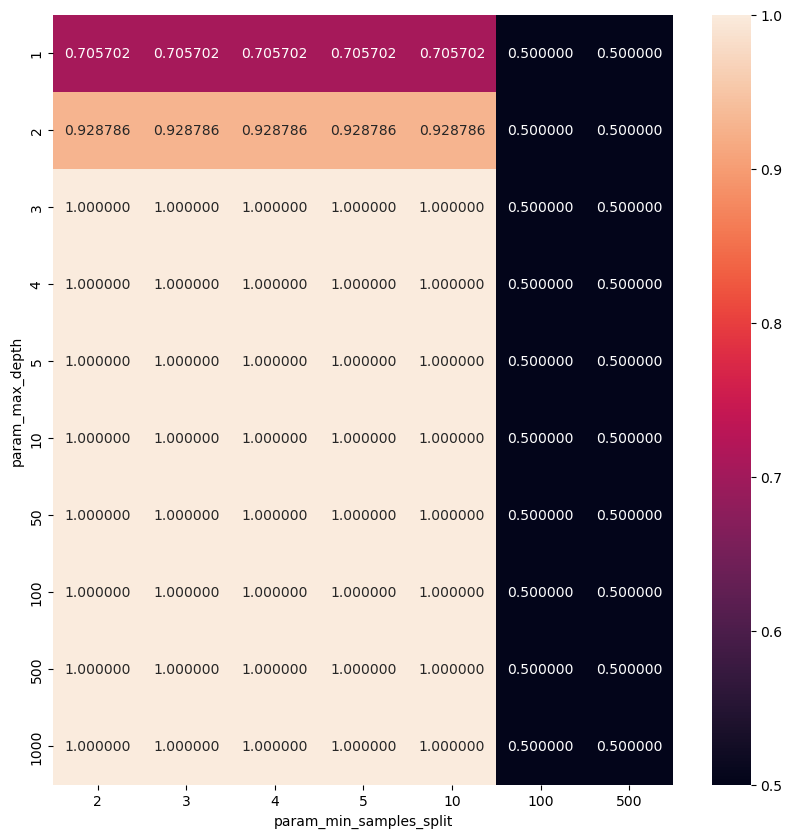

{'max_depth': 3, 'min_samples_split': 2}
1.0


In [7]:

parameters = {'max_depth': [1,2, 3, 4, 5, 10, 50, 100,500,1000],
                  'min_samples_split': [2,3, 4, 5, 10,100,500]}


clf = GridSearchCV(tree_clf, parameters,cv=3, scoring='roc_auc',return_train_score='true')
clf.fit(X_train, Y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

results = results.sort_values(['param_max_depth'])

print("TRAIN SCORE")

r1=results.pivot("param_max_depth","param_min_samples_split","mean_train_score")
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(r1,annot=True,fmt='f', ax=ax)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
# fig, ax = plt.subplots(figsize=(10,10))

plt.show()
print("TEST SCORE")
r2=results.pivot("param_max_depth","param_min_samples_split","mean_test_score")
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(r2,annot=True,fmt='f',ax=ax)
plt.show()
print(clf.best_params_)
print(clf.best_score_)



Basic Model


Test accuracy: 100.00%


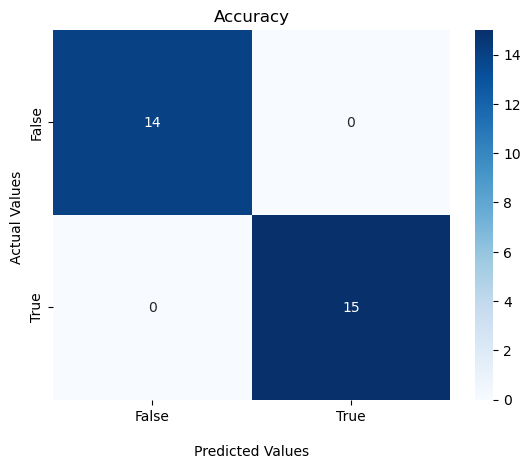

[[14  0]
 [ 0 15]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

1.0


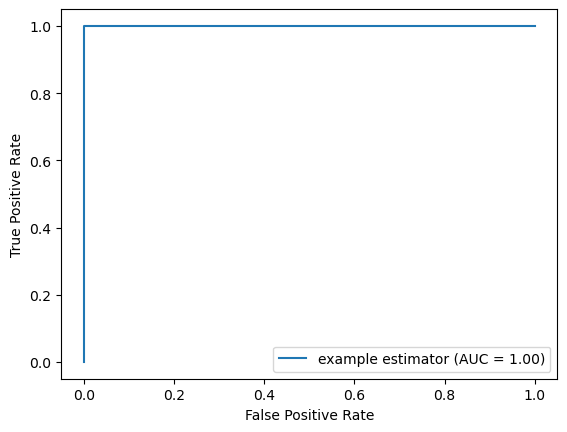

In [8]:

y_pred=tree_clf.predict(X_test)
check_accuracy(y_pred, Y_test, 'Basic Model', df_hold_scores)


## 10 Folds cross validation

In [9]:
tree_clf_10fold = DecisionTreeClassifier(criterion='gini', random_state=42)
scores = cross_val_score(estimator=tree_clf_10fold, X=X_train, y=Y_train, cv=10, n_jobs=4)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
 

1.00 accuracy with a standard deviation of 0.00


# Grid search 

Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'max_depth': 4, 'max_features': 2, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'random_state': 42}


Grid Search


Test accuracy: 89.66%


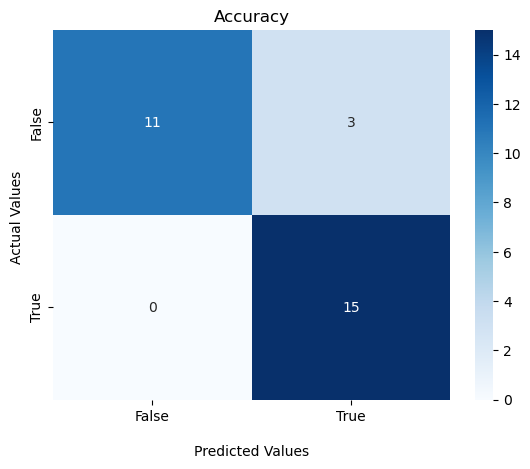

[[11  3]
 [ 0 15]]


              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.83      1.00      0.91        15

    accuracy                           0.90        29
   macro avg       0.92      0.89      0.89        29
weighted avg       0.91      0.90      0.90        29

0.8928571428571428


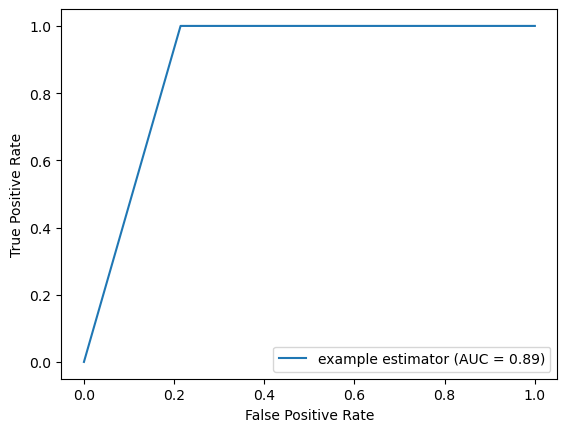

In [10]:
tree_clf_grid_search = DecisionTreeClassifier()

# tree_clf_grid_search.get_params().keys()  -- To check the parameters we can adapt

# defining parameter range 
param_grid = { 'max_depth': [4, 5, 6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'max_leaf_nodes': [2,3,4],
    'random_state': [42] }  
   
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, Y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
check_accuracy(grid_predictions, Y_test, 'Grid Search', df_hold_scores)


# Grid search classifier to use in multiple trees

In [11]:
tree_clf_grid_search = DecisionTreeClassifier(max_depth= 4, max_features= 2, 
                                              max_leaf_nodes = 3, min_samples_leaf= 3, 
                                              random_state = 42)

# fitting the model for grid search 
tree_clf_grid_search.fit(X_train, Y_train) 

DecisionTreeClassifier(max_depth=4, max_features=2, max_leaf_nodes=3,
                       min_samples_leaf=3, random_state=42)

In [12]:

tree_clf_grid_search_predictions = tree_clf_grid_search.predict(X_test) 
   
# print classification report 
print(classification_report(Y_test, tree_clf_grid_search_predictions)) 

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.83      1.00      0.91        15

    accuracy                           0.90        29
   macro avg       0.92      0.89      0.89        29
weighted avg       0.91      0.90      0.90        29





Full Train


Test accuracy: 92.17%


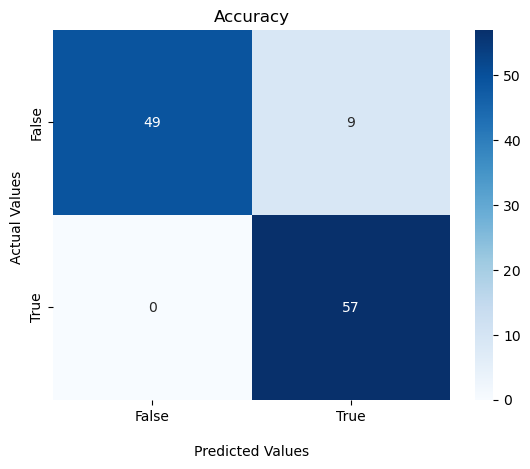

[[49  9]
 [ 0 57]]


              precision    recall  f1-score   support

         0.0       1.00      0.84      0.92        58
         1.0       0.86      1.00      0.93        57

    accuracy                           0.92       115
   macro avg       0.93      0.92      0.92       115
weighted avg       0.93      0.92      0.92       115

0.9224137931034483


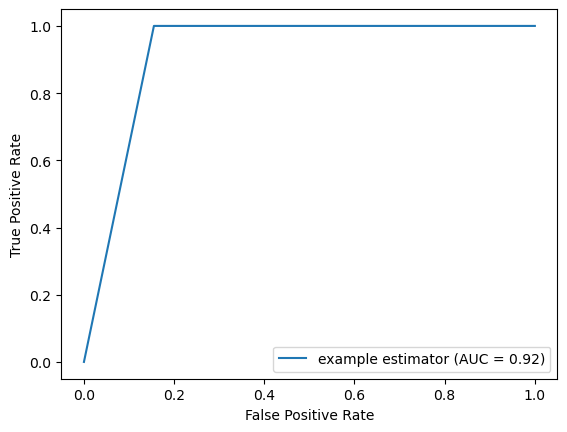



Full Test


Test accuracy: 89.66%


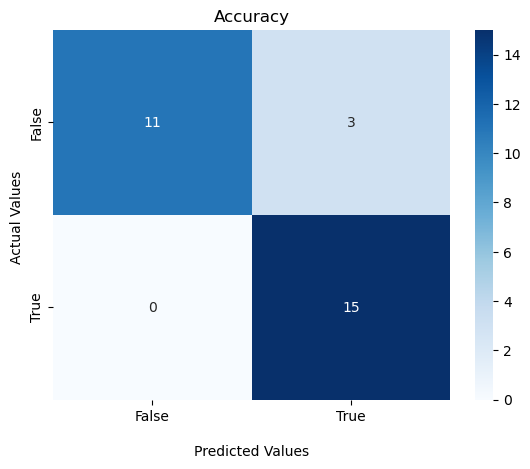

[[11  3]
 [ 0 15]]


              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.83      1.00      0.91        15

    accuracy                           0.90        29
   macro avg       0.92      0.89      0.89        29
weighted avg       0.91      0.90      0.90        29

0.8928571428571428


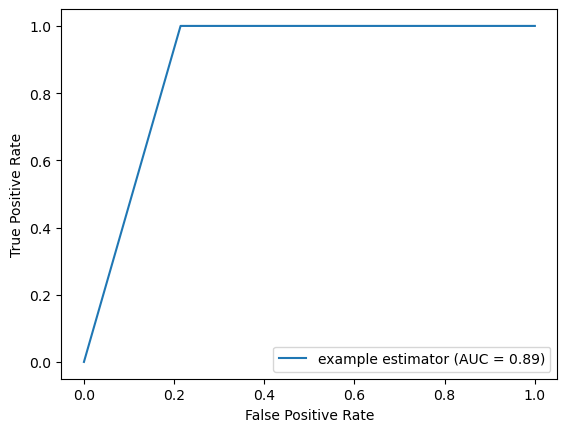



Train after 30% extracted


Test accuracy: 91.25%


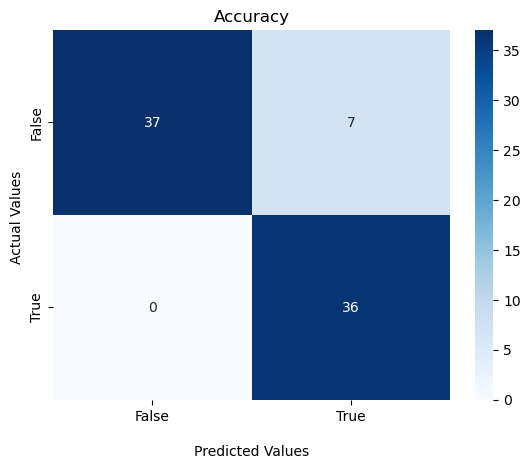

[[37  7]
 [ 0 36]]


              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91        44
         1.0       0.84      1.00      0.91        36

    accuracy                           0.91        80
   macro avg       0.92      0.92      0.91        80
weighted avg       0.93      0.91      0.91        80

0.9204545454545455


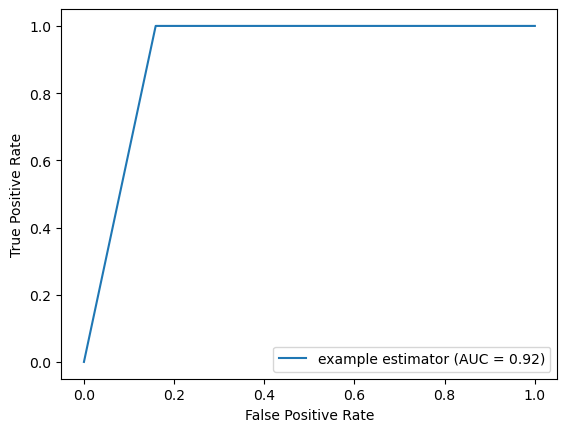



Test after 30% added


Test accuracy: 92.19%


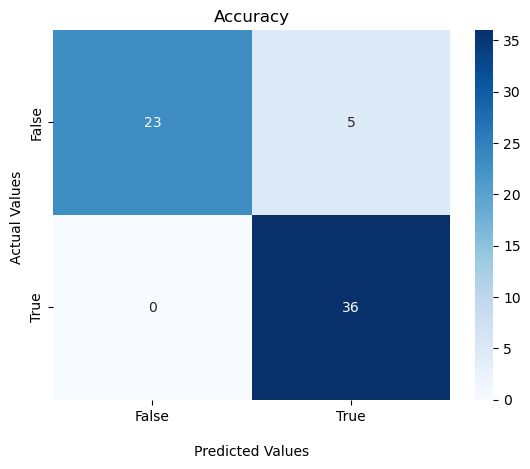

[[23  5]
 [ 0 36]]


              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        28
         1.0       0.88      1.00      0.94        36

    accuracy                           0.92        64
   macro avg       0.94      0.91      0.92        64
weighted avg       0.93      0.92      0.92        64

0.9107142857142857


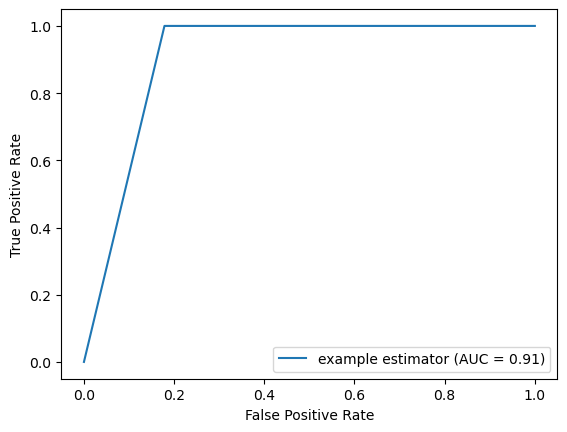



Train after 60% extracted


Test accuracy: 89.13%


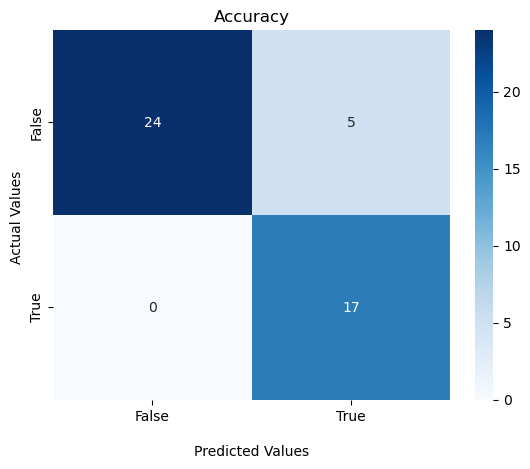

[[24  5]
 [ 0 17]]


              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        29
         1.0       0.77      1.00      0.87        17

    accuracy                           0.89        46
   macro avg       0.89      0.91      0.89        46
weighted avg       0.92      0.89      0.89        46

0.9137931034482758


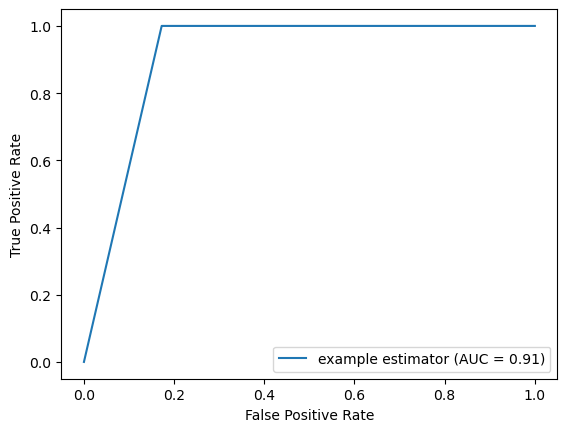



Test after 60% added


Test accuracy: 92.86%


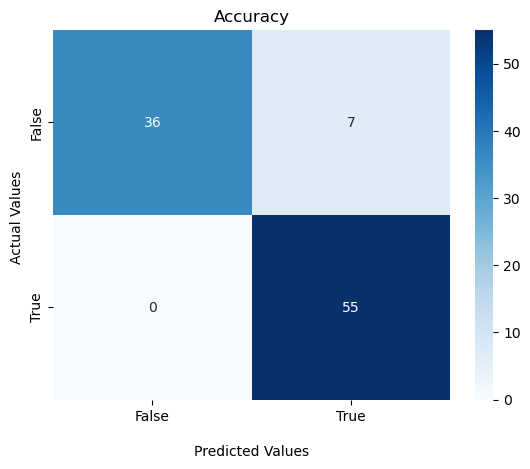

[[36  7]
 [ 0 55]]


              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91        43
         1.0       0.89      1.00      0.94        55

    accuracy                           0.93        98
   macro avg       0.94      0.92      0.93        98
weighted avg       0.94      0.93      0.93        98

0.9186046511627907


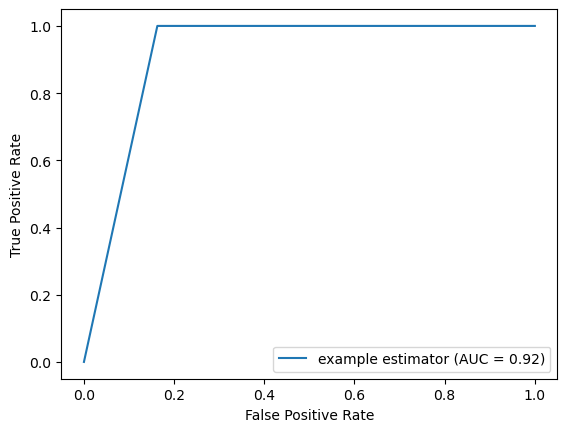

In [13]:
# Plot multiple accuracies against one another 

tree_clf_grid_search_predictions = tree_clf_grid_search.predict(X_train) 
check_accuracy(tree_clf_grid_search_predictions, Y_train, 'Full Train', df_hold_scores)


tree_clf_grid_search_predictions = tree_clf_grid_search.predict(X_test) 
check_accuracy(tree_clf_grid_search_predictions, Y_test, 'Full Test', df_hold_scores)


tree_clf_grid_search_predictions = tree_clf_grid_search.predict(X_train_extract30) 
check_accuracy(tree_clf_grid_search_predictions, Y_train_extract30, 'Train after 30% extracted', df_hold_scores)

tree_clf_grid_search_predictions = tree_clf_grid_search.predict(X_test_extra_30) 
check_accuracy(tree_clf_grid_search_predictions, Y_test_extra_30, 'Test after 30% added', df_hold_scores)


tree_clf_grid_search_predictions = tree_clf_grid_search.predict(X_train_extract60) 
check_accuracy(tree_clf_grid_search_predictions, Y_train_extract60, 'Train after 60% extracted', df_hold_scores)

tree_clf_grid_search_predictions = tree_clf_grid_search.predict(X_test_extra_60) 
check_accuracy(tree_clf_grid_search_predictions, Y_test_extra_60, 'Test after 60% added', df_hold_scores)



<AxesSubplot:xlabel='header', ylabel='Accuracy'>

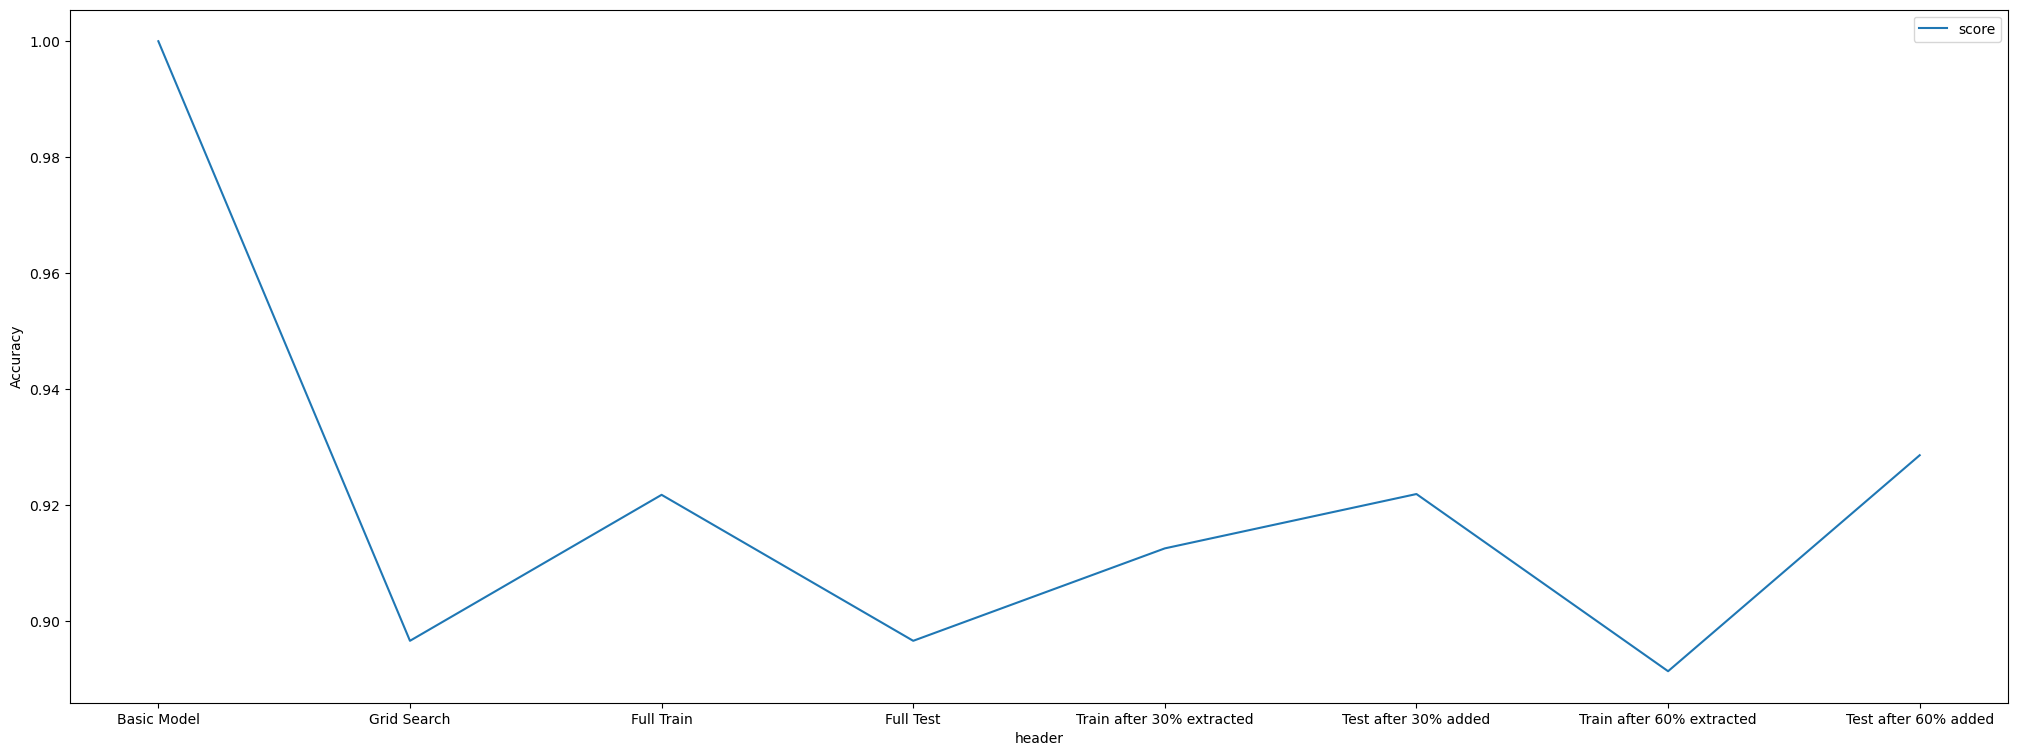

In [14]:
df_hold_scores.plot(x="header", y=["score" ], ylabel = 'Accuracy', kind="line",  figsize=(25, 9))

# Using best fit parameters

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'max_depth': 4, 'min_samples_split': 3, 'random_state': 42}


Grid Search


Test accuracy: 100.00%


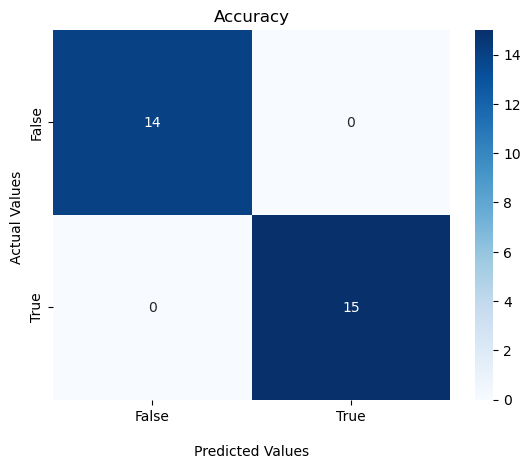

[[14  0]
 [ 0 15]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

1.0


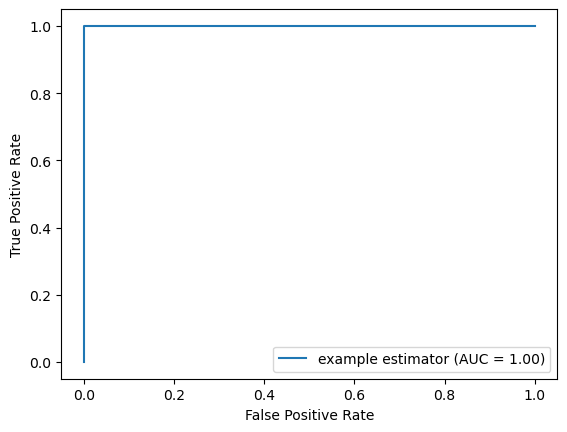

In [15]:
tree_clf_grid_search = DecisionTreeClassifier()

# tree_clf_grid_search.get_params().keys()  -- To check the parameters we can adapt

# defining parameter range 
param_grid = { 'max_depth': [2,3,4, 5, 6,10],
    'min_samples_split': [2,3, 4, 5,10],
    'random_state': [42] }  
   
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, Y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
check_accuracy(grid_predictions, Y_test, 'Grid Search', df_hold_scores)




Full Train


Test accuracy: 100.00%


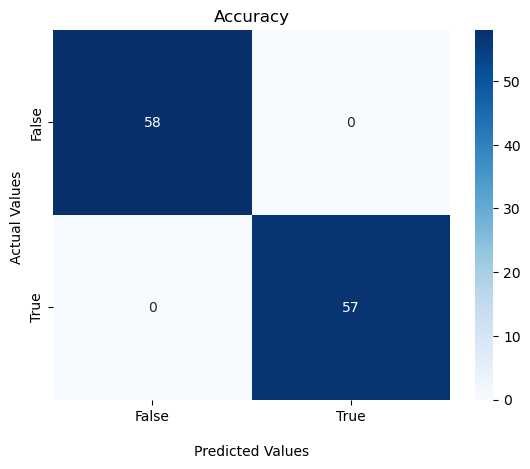

[[58  0]
 [ 0 57]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        58
         1.0       1.00      1.00      1.00        57

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115

1.0


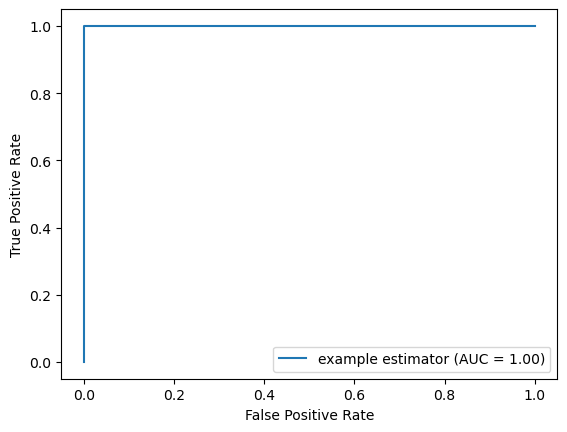



Full Test


Test accuracy: 100.00%


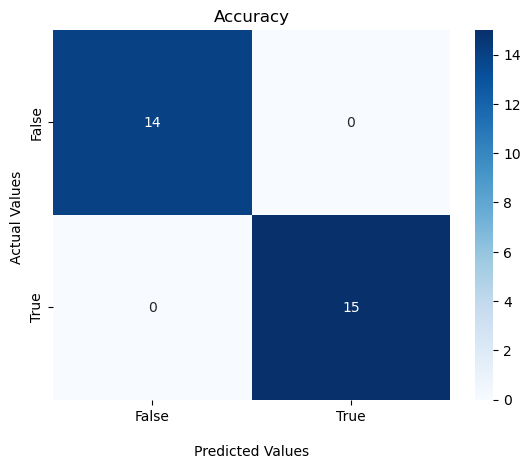

[[14  0]
 [ 0 15]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

1.0


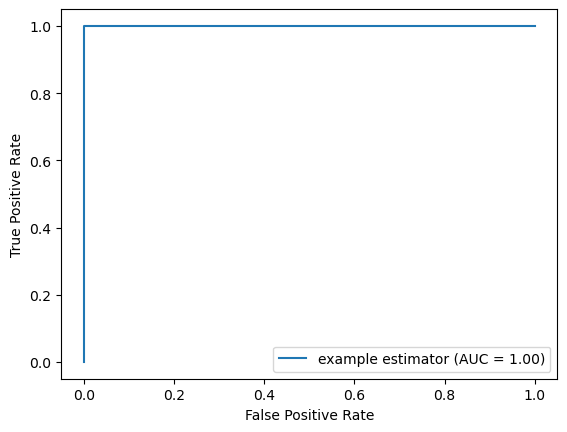



Train after 30% extracted


Test accuracy: 100.00%


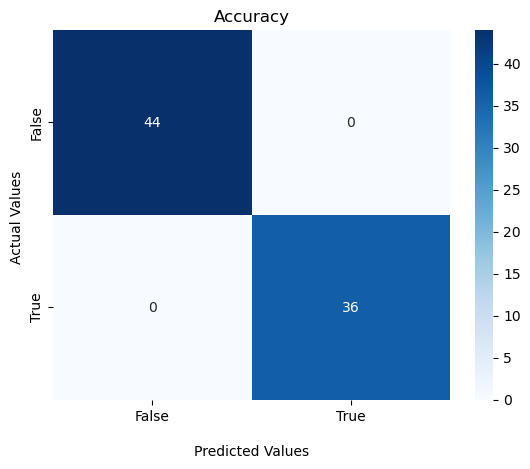

[[44  0]
 [ 0 36]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

1.0


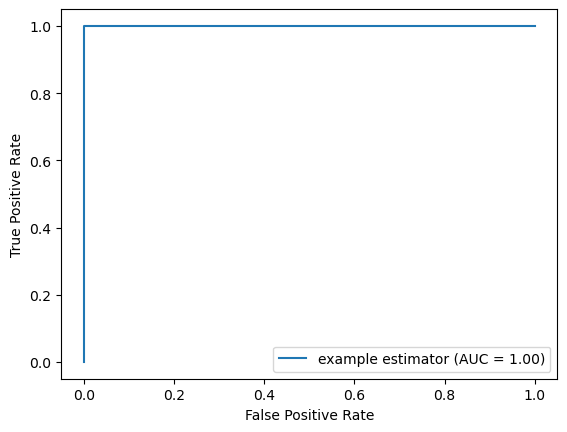



Test after 30% added


Test accuracy: 100.00%


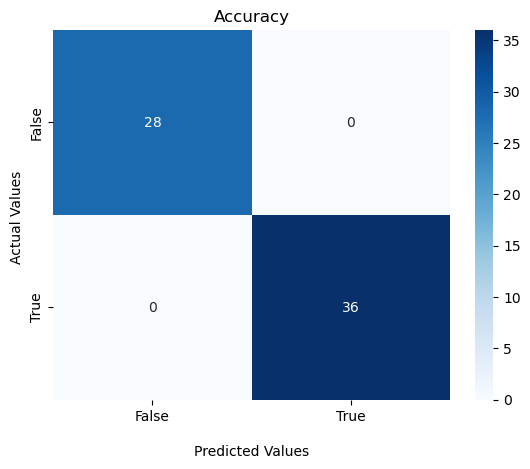

[[28  0]
 [ 0 36]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        36

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64

1.0


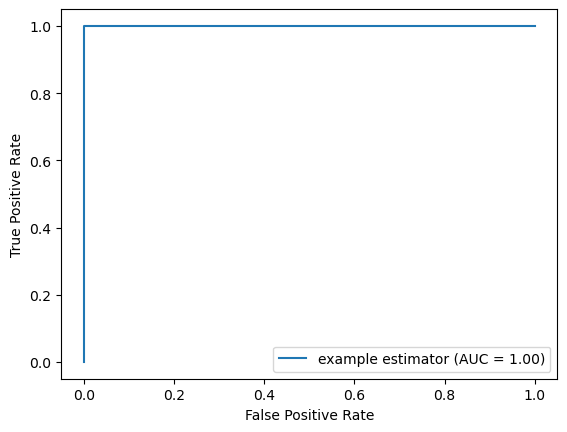



Train after 60% extracted


Test accuracy: 100.00%


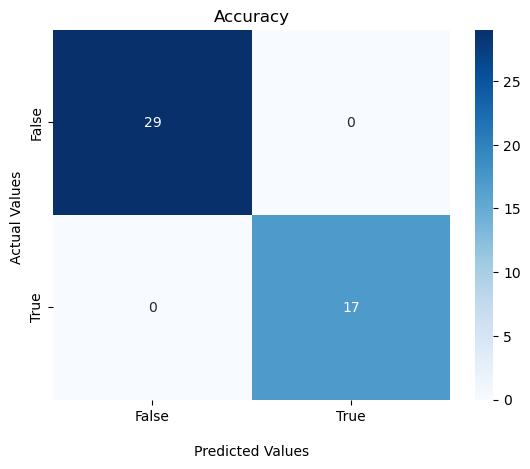

[[29  0]
 [ 0 17]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       1.00      1.00      1.00        17

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

1.0


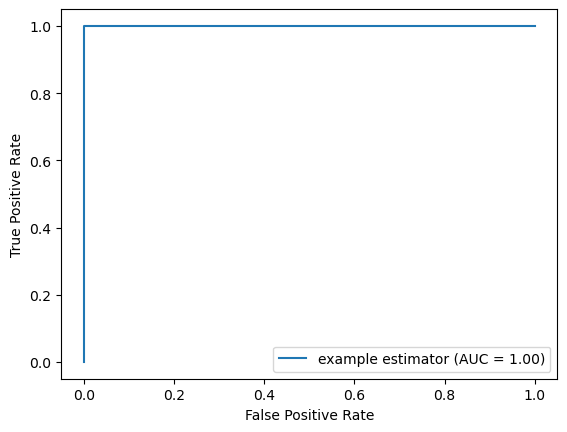



Test after 60% added


Test accuracy: 100.00%


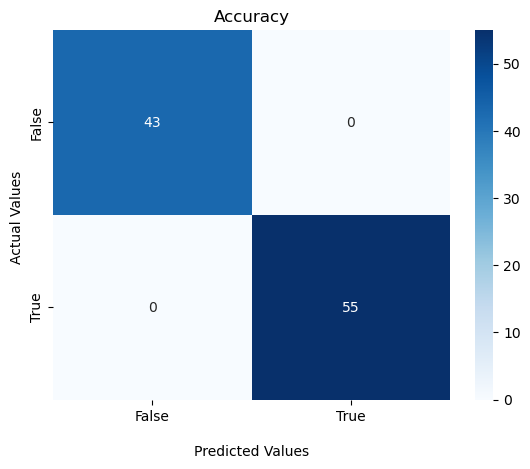

[[43  0]
 [ 0 55]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        55

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

1.0


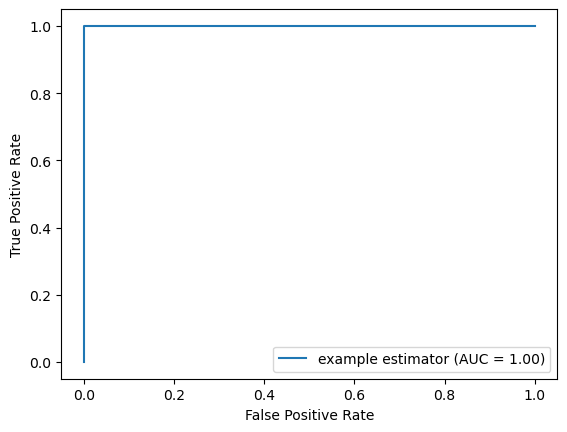

In [16]:
# Plot multiple accuracies against one another 

tree_clf_grid_search_predictions = grid.predict(X_train) 
check_accuracy(tree_clf_grid_search_predictions, Y_train, 'Full Train', df_hold_scores)


tree_clf_grid_search_predictions = grid.predict(X_test) 
check_accuracy(tree_clf_grid_search_predictions, Y_test, 'Full Test', df_hold_scores)


tree_clf_grid_search_predictions = grid.predict(X_train_extract30) 
check_accuracy(tree_clf_grid_search_predictions, Y_train_extract30, 'Train after 30% extracted', df_hold_scores)

tree_clf_grid_search_predictions = grid.predict(X_test_extra_30) 
check_accuracy(tree_clf_grid_search_predictions, Y_test_extra_30, 'Test after 30% added', df_hold_scores)


tree_clf_grid_search_predictions = grid.predict(X_train_extract60) 
check_accuracy(tree_clf_grid_search_predictions, Y_train_extract60, 'Train after 60% extracted', df_hold_scores)

tree_clf_grid_search_predictions = grid.predict(X_test_extra_60) 
check_accuracy(tree_clf_grid_search_predictions, Y_test_extra_60, 'Test after 60% added', df_hold_scores)


<AxesSubplot:xlabel='header', ylabel='Accuracy'>

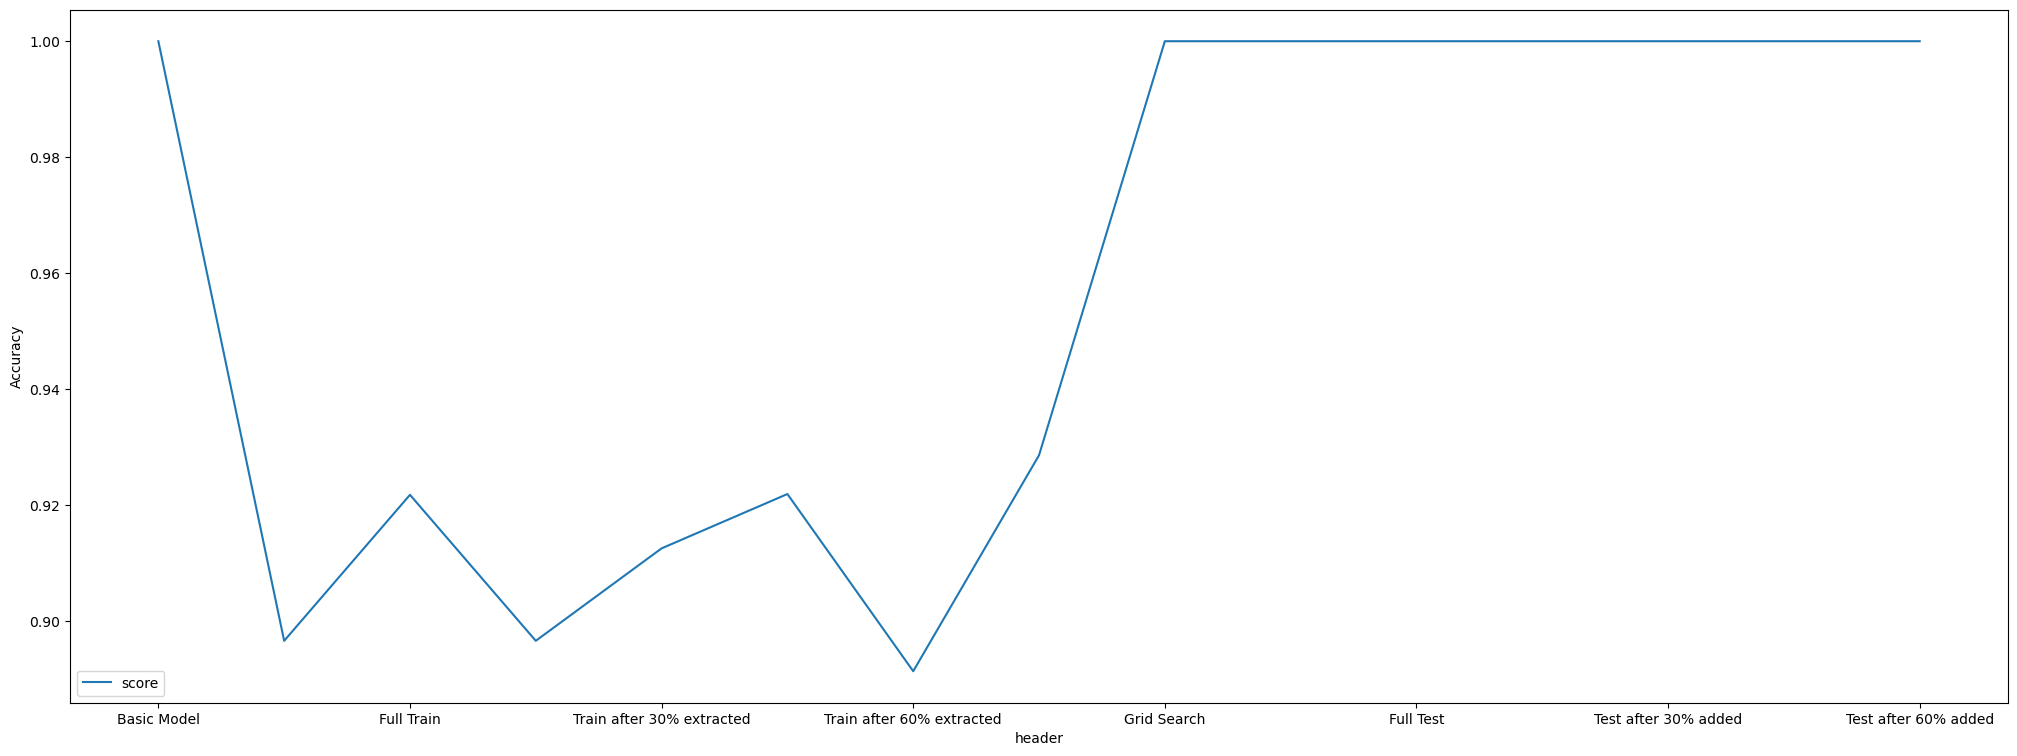

In [17]:
df_hold_scores.plot(x="header", y=["score" ], ylabel = 'Accuracy', kind="line",  figsize=(25, 9))